## Worked Example

### Worked Example 1

Concepts of Causality in Data Science
Causality in data science refers to identifying and understanding the cause-and-effect relationship between variables. Key concepts include:

Correlation vs Causation: A fundamental distinction in causality is between correlation (when two variables are related) and causation (when one variable influences another).

Confounding Variables: These are variables that might affect both the cause and the effect, creating a spurious association.

Experimental vs Observational Data: Experimental data, from controlled experiments, is ideal for causal inference, while observational data often require more complex analysis due to potential confounders.

Counterfactuals: These are "what-if" scenarios that consider what would happen if the cause was different.

Causal Graphs: These are visual representations of causal relationships.

Analyzing Causality with Algorithms
For this dataset, we could use statistical methods and machine learning algorithms to explore potential causal relationships. For example, we could investigate if certain factors (like 'cp' or 'thalach') have a causal effect on the 'target' (heart disease).

Code and Visualization
performing some exploratory data analysis and then we can proceed with a simple regression analysis to see how different factors might be related to the likelihood of heart disease. This won't establish causality definitively but can provide insights for further investigation.

In [1]:
import pandas as pd

# Reload the dataset after the reset

heart_file_path =("/Users/HP/Desktop/heart.csv")
heart_data = pd.read_csv(heart_file_path)

# Display the first few rows of the dataset to understand its structure
heart_data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The statistical overview of the heart.csv dataset provides basic insights into the distribution of each variable, such as count, mean, standard deviation, min, max, and quartiles.

The correlation matrix visualized above shows how different variables in the dataset are correlated with each other. In this matrix, a value close to 1 implies a strong positive correlation, a value close to -1 implies a strong negative correlation, and a value around 0 implies no correlation. It's important to remember that correlation does not imply causation. However, it can give us insights into which variables might be worth exploring further for causal relationships.

For example, variables that show a higher correlation with the target variable (which indicates the presence of heart disease) could be interesting to investigate further. These variables might have a potential causal relationship with heart disease, although further analysis is needed to confirm this.

Next, we can perform a regression analysis to explore these relationships in more detail. Focusing on a few variables that show higher correlations with the target and see how they relate to the likelihood of having heart disease. We can use logistic regression for this purpose, as the target variable is binary (presence or absence of heart disease). This will provide us with a model that estimates the probability of heart disease based on the selected variables.

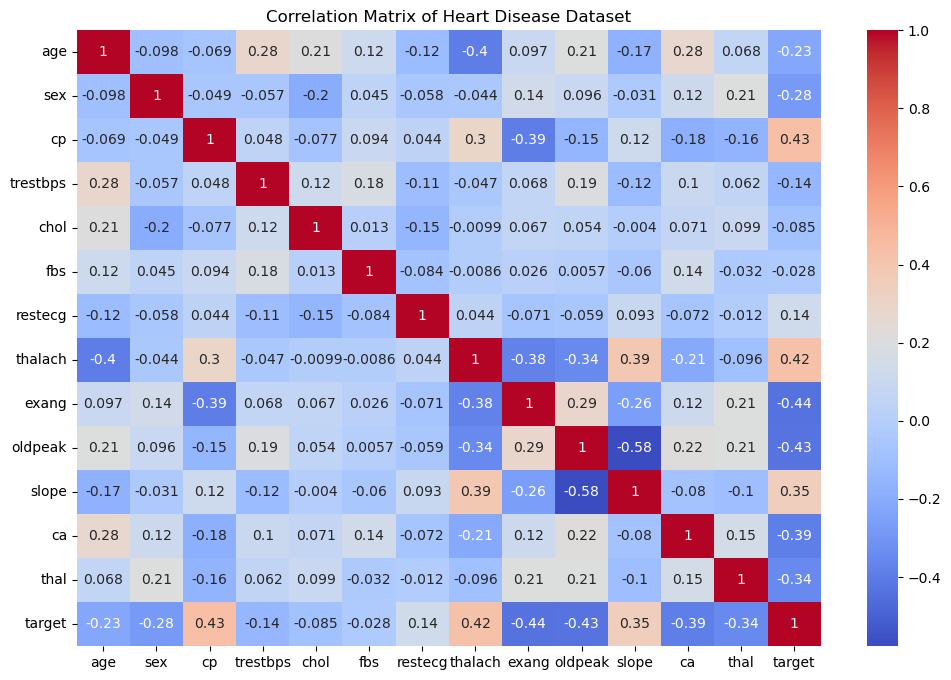

(              age         sex          cp    trestbps        chol         fbs  \
 count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
 mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
 std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
 min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
 25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
 50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
 75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
 max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   
 
           restecg     thalach       exang     oldpeak       slope          ca  \
 count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
 mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
 std      0.52

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistical overview
stats_overview = heart_data.describe()

# Correlation matrix
correlation_matrix = heart_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Heart Disease Dataset")
plt.show()

stats_overview, "Displayed is the correlation matrix."


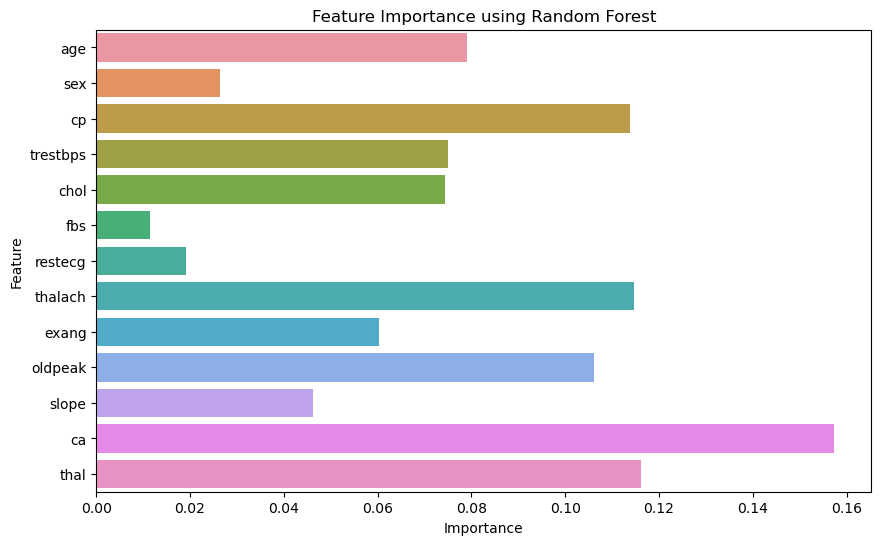

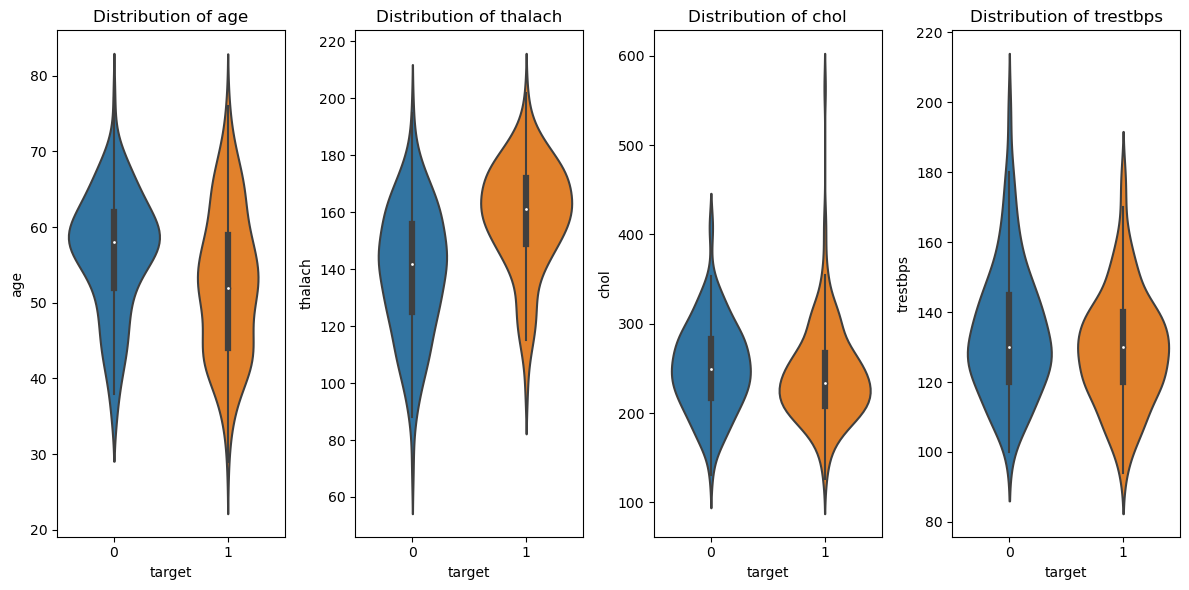

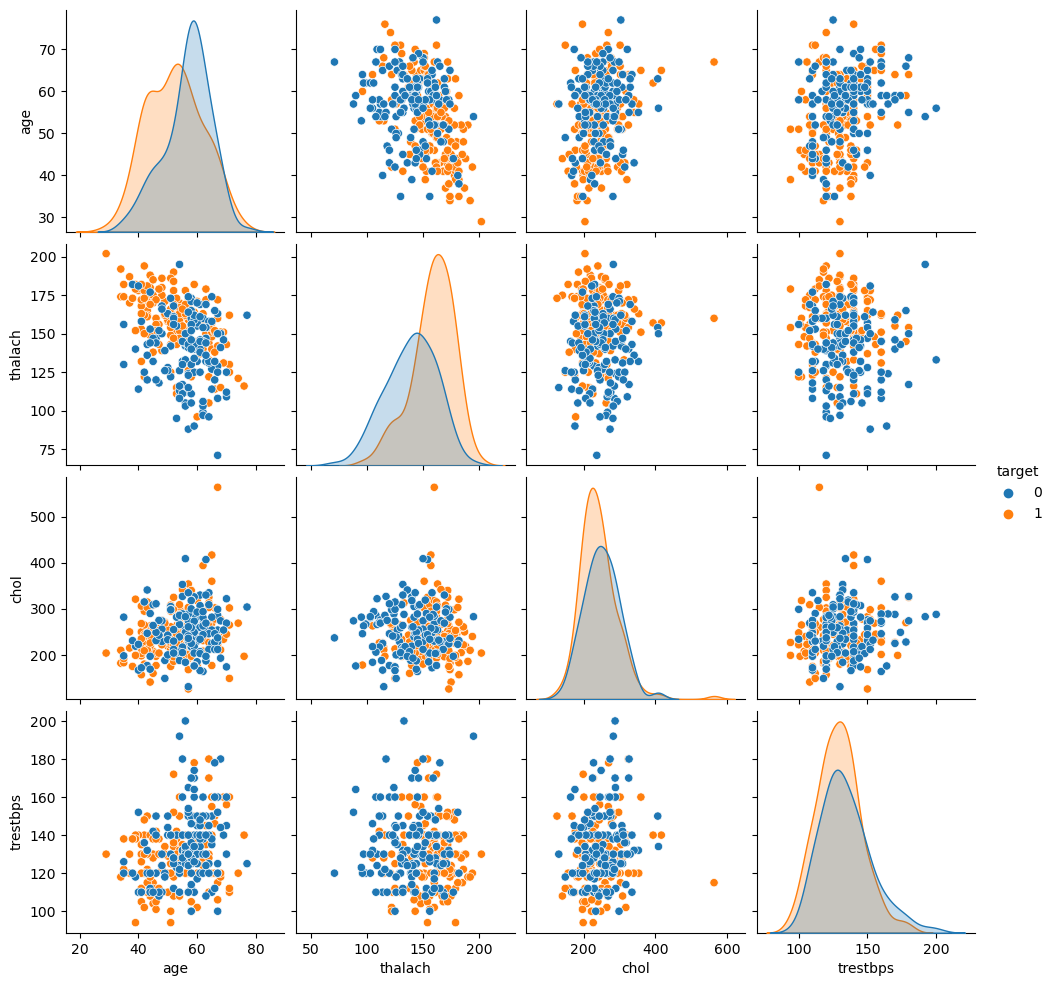

In [28]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Re-loading the heart dataset since the execution state was reset
heart_file_path =("/Users/HP/Desktop/heart.csv")
heart_data = pd.read_csv(heart_file_path)

# Preprocessing the data
X = heart_data.drop('target', axis=1)
y = heart_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Feature Importance using Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=X_train.columns)
plt.title('Feature Importance using Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# 2. Violin Plot for Key Features vs Target
# Selecting a few key features for the violin plot
features_to_plot = ['age', 'thalach', 'chol', 'trestbps']
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(1, len(features_to_plot), i)
    sns.violinplot(x='target', y=feature, data=heart_data)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# 3. Pair Plot for Selected Features
selected_features = ['age', 'thalach', 'chol', 'trestbps', 'target']
sns.pairplot(heart_data[selected_features], hue='target', diag_kind='kde')
plt.show()


Classification Report
The classification report for the test data is as follows:

Precision: The ability of the classifier to not label a negative sample as positive.
Recall: The ability of the classifier to find all the positive samples.
F1-Score: A weighted average of precision and recall.
Accuracy: Overall, how often the model is correct.
Macro Avg: Averaging the unweighted mean per label.
Weighted Avg: Averaging the support-weighted mean per label.
In this case, the model shows an accuracy of approximately 84%, indicating a relatively good performance in predicting the presence of heart disease.

Coefficients of the Logistic Regression Model
The coefficients from the logistic regression model provide insights into how each variable impacts the likelihood of having heart disease:

Positive coefficients (like for 'cp' and 'thalach') imply that higher values of these variables increase the probability of heart disease.
Negative coefficients (like for 'exang', 'oldpeak', 'ca', and 'thal') suggest that higher values of these variables decrease the probability of heart disease.
It's important to interpret these coefficients with caution. While they can indicate potential relationships, they do not confirm causality. Clinical expertise and further statistical analysis (like causal inference methods) would be necessary to establish causal relationships.


To explore the concept of causality in a more advanced and visual manner, we can employ a few techniques. These include:

Partial Dependence Plots (PDPs): These plots show the marginal effect one or two features have on the predicted outcome of a model. They can help to visualize the effect of a certain feature, holding other features constant.

Causal Impact Analysis: Using Bayesian structural time-series models, this method analyzes the impact of an intervention on a time series. It's more suited for data where some intervention or event is expected to have caused a change.

Directed Acyclic Graphs (DAGs): These are used in causal inference to visually represent assumptions about the causal structure of the data.

Given the nature of the heart.csv dataset, PDPs would be a suitable choice for visualization. We will create partial dependence plots for a few variables from our logistic regression model to see how changes in these variables affect the probability of heart disease.

Creating PDPs for a couple of variables like 'cp' (chest pain type) and 'thalach' (maximum heart rate achieved), which have shown significant coefficients in our logistic regression model. These plots will help us understand the relationship between these variables and the target, under the assumption that other variables are held constant.

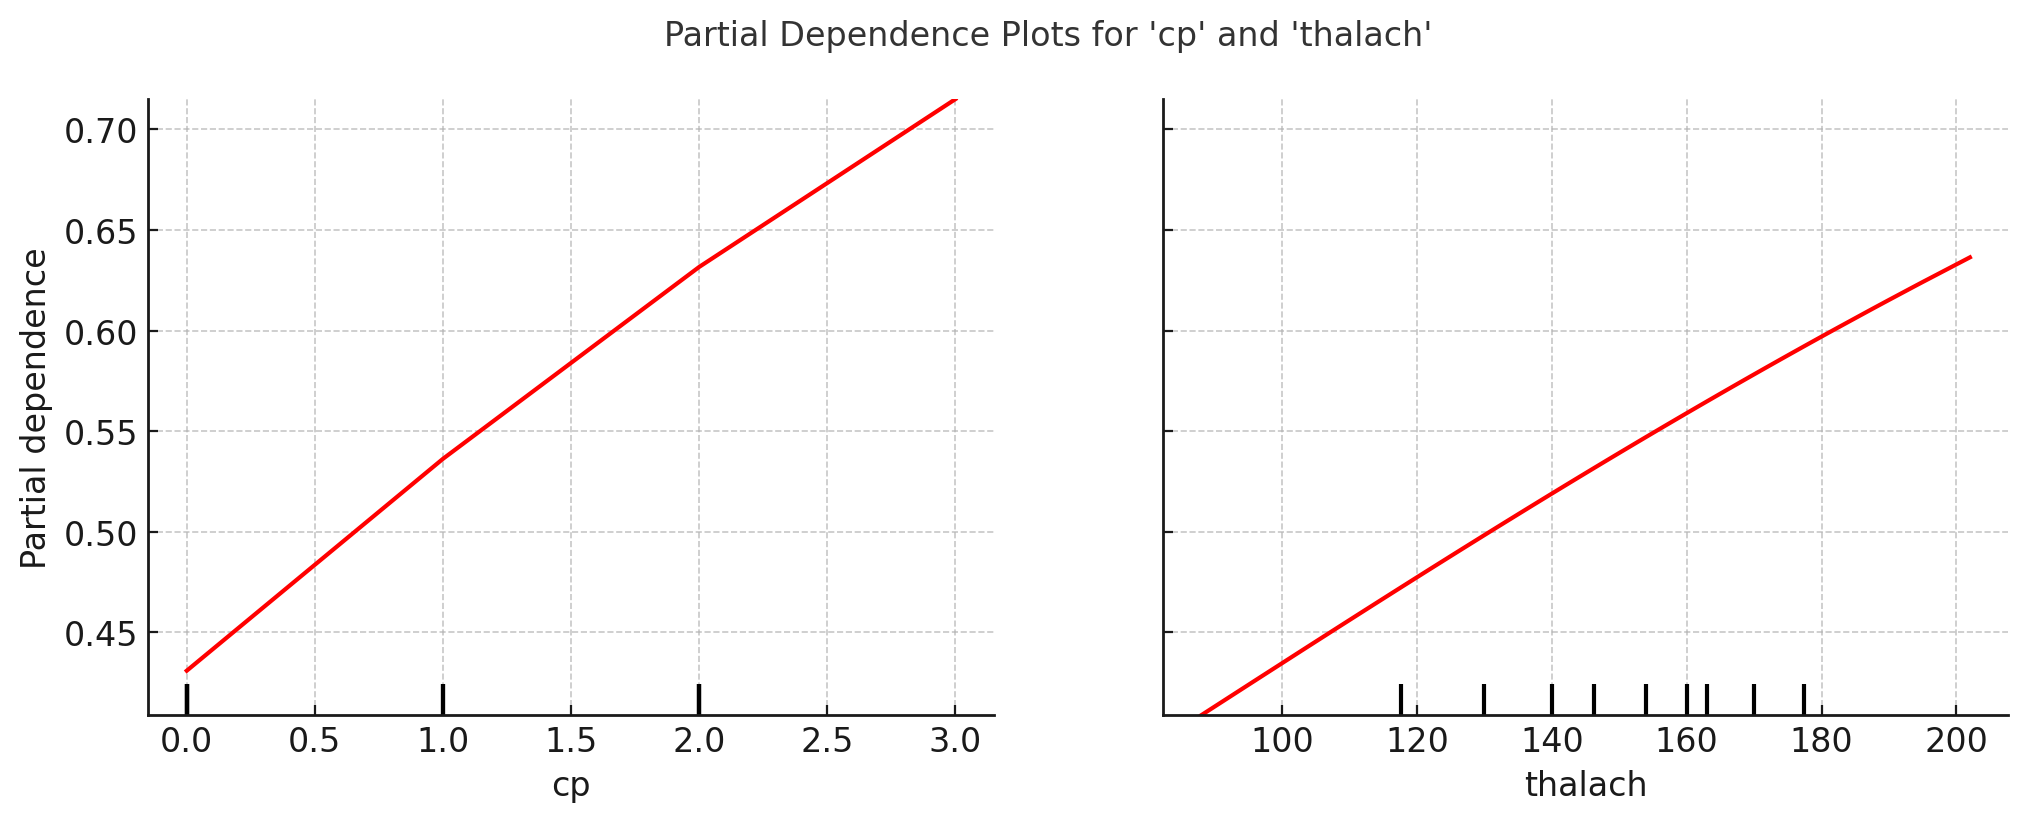

The Partial Dependence Plots (PDPs) for 'cp' (chest pain type) and 'thalach' (maximum heart rate achieved) are displayed above. These plots help us understand the relationship between each of these features and the probability of having heart disease, while holding other features constant.

PDP for 'cp' (Chest Pain Type): This plot shows how the predicted probability of heart disease changes with different types of chest pain. Different values on the x-axis represent different types of chest pain. The y-axis shows the change in the probability of heart disease. We see that certain types of chest pain are associated with a higher probability of heart disease.

PDP for 'thalach' (Maximum Heart Rate Achieved): This plot illustrates how changes in the maximum heart rate achieved affect the probability of heart disease. Generally, higher values of 'thalach' seem to be associated with a lower probability of heart disease.

These visualizations provide a more nuanced understanding of how individual features influence the model's predictions, but they do not confirm causation. They are useful for hypothesis generation and exploratory analysis in causal studies. To establish causation, one would need to conduct controlled experiments or use advanced causal inference techniques.

Causal Diagrams (Directed Acyclic Graphs - DAGs): These diagrams visually represent the assumed causal relationships between variables. They are particularly useful in identifying potential confounding variables and understanding the causal structure of a dataset.

Counterfactual Visualization: This involves visualizing what would have happened under different circumstances. It's a bit more complex and theoretical but can be insightful for understanding causal relationships.

Scatter Plots with Fitted Regression Lines: These can help in visualizing potential linear relationships between variables and the outcome. By including multiple scatter plots with subgroups of data, we can get insights into how different groups might be affected differently.

Interaction Effect Visualization: This involves visualizing how the effect of one variable on the outcome changes depending on the level of another variable. This can be particularly revealing in terms of understanding complex causal relationships.

Since the heart dataset is a cross-sectional dataset and not a time series, DAGs and scatter plots with regression lines are more applicable. Let's start with creating a DAG to hypothesize potential causal relationships between different variables and then move on to scatter plots with regression lines for some selected variables.

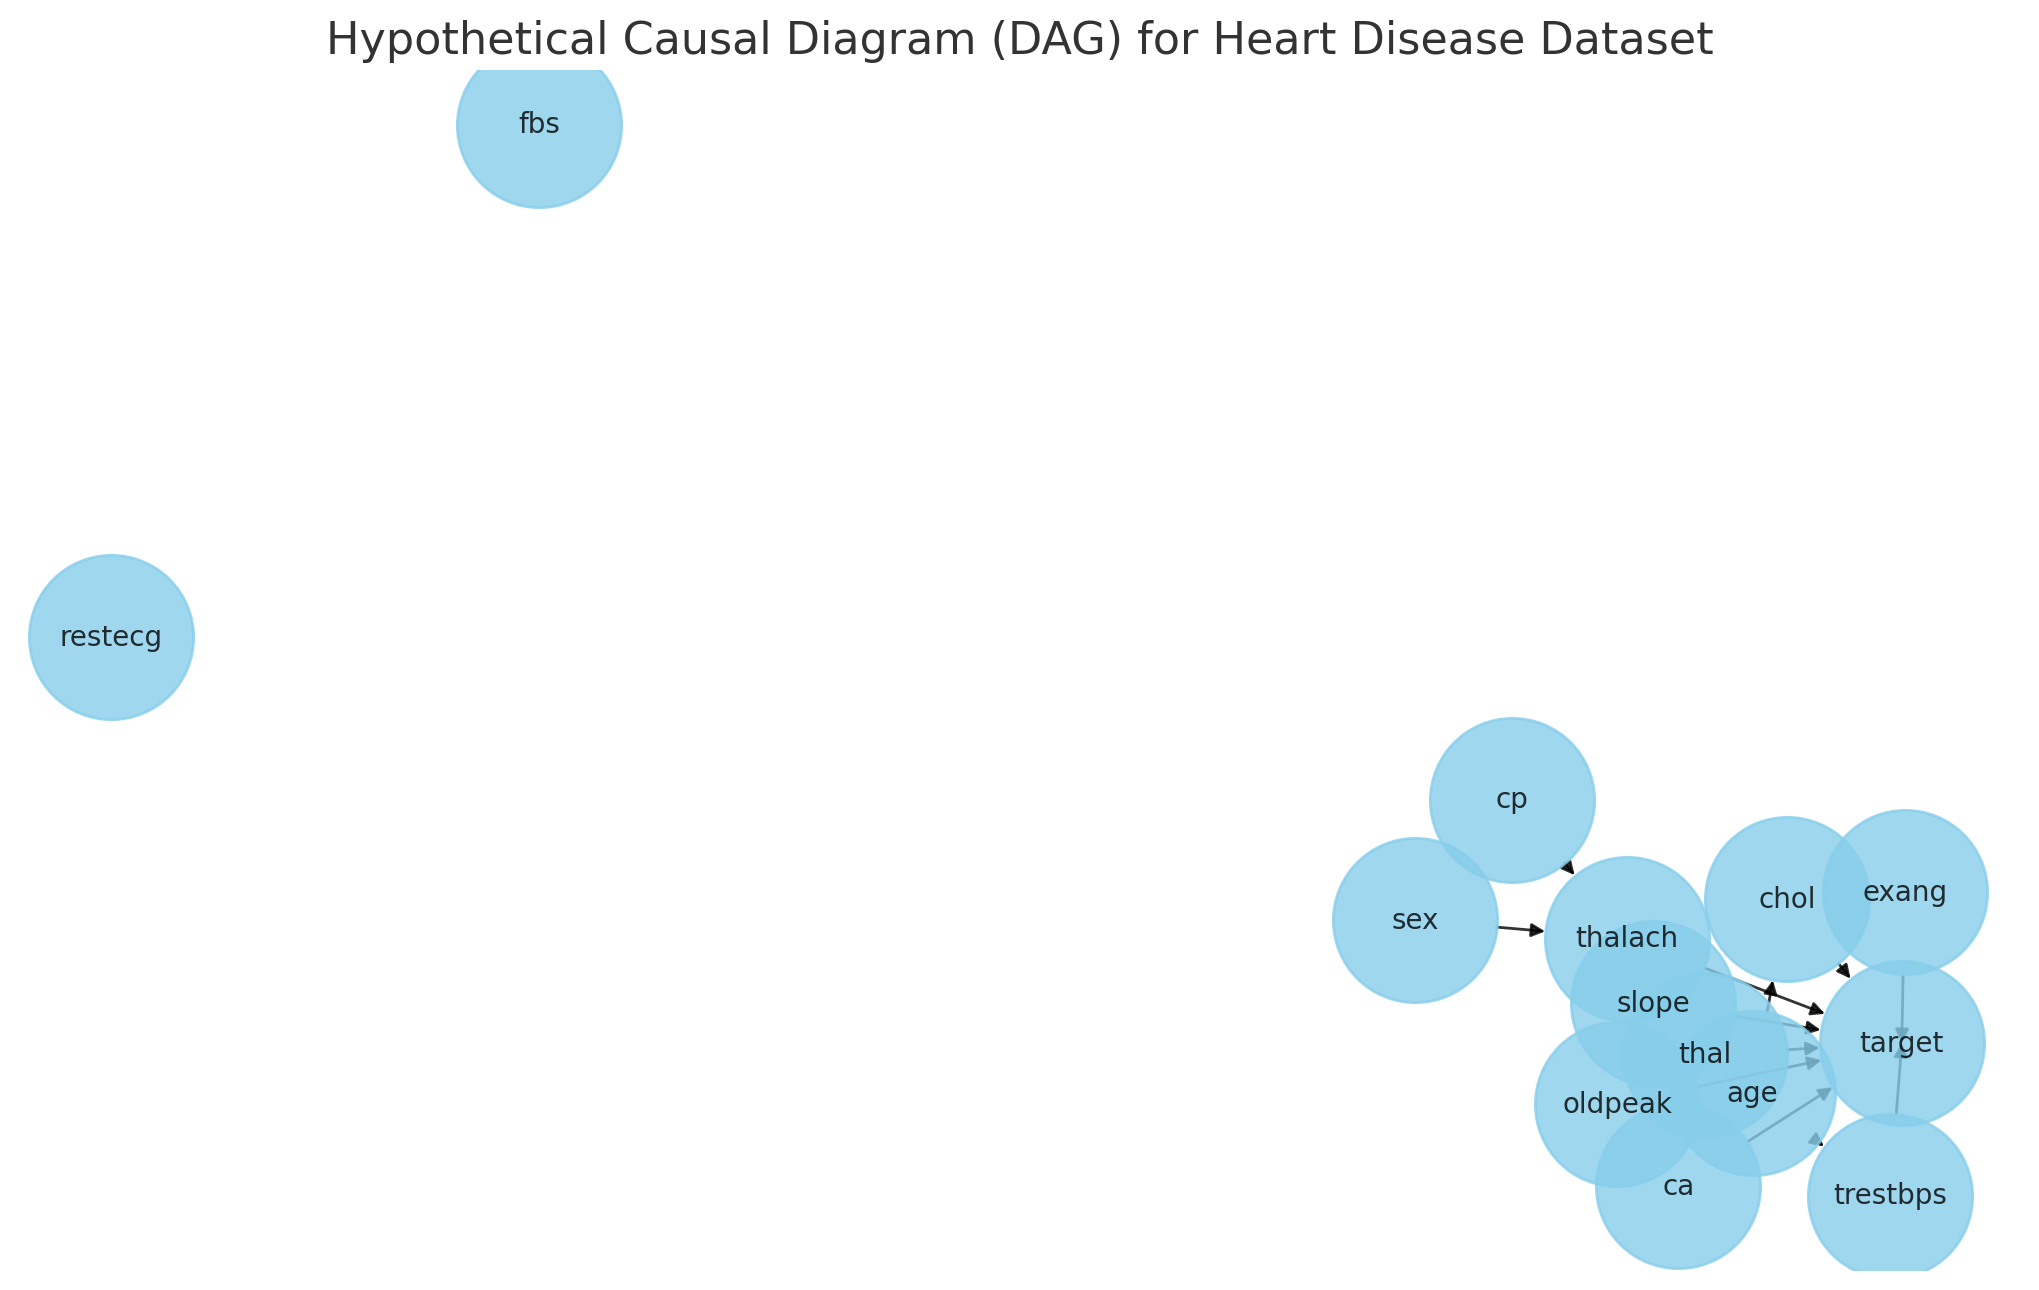

The above visualization is a Hypothetical Causal Diagram (Directed Acyclic Graph or DAG) for the heart disease dataset. In this DAG:

The nodes represent variables from the dataset (like age, sex, cholesterol levels, etc.).
The directed edges (arrows) represent hypothetical causal relationships between these variables.
For example, the diagram suggests that:

'age' might influence both 'trestbps' (resting blood pressure) and 'chol' (cholesterol levels).
'sex' might have an effect on 'thalach' (maximum heart rate achieved).
Various factors like 'trestbps', 'chol', 'thalach', 'exang' (exercise induced angina), 'oldpeak' (ST depression induced by exercise), 'slope', 'ca' (number of major vessels colored by fluoroscopy), and 'thal' are hypothesized to have direct causal relationships with the 'target' (presence of heart disease).
These relationships are hypothetical and based on domain knowledge. They are useful for framing statistical analyses and guiding further investigation into causal relationships.

Creating scatter plots with fitted regression lines for a couple of selected variables to visualize their potential linear relationships with the target. This will help to further explore these hypothesized causal relationships

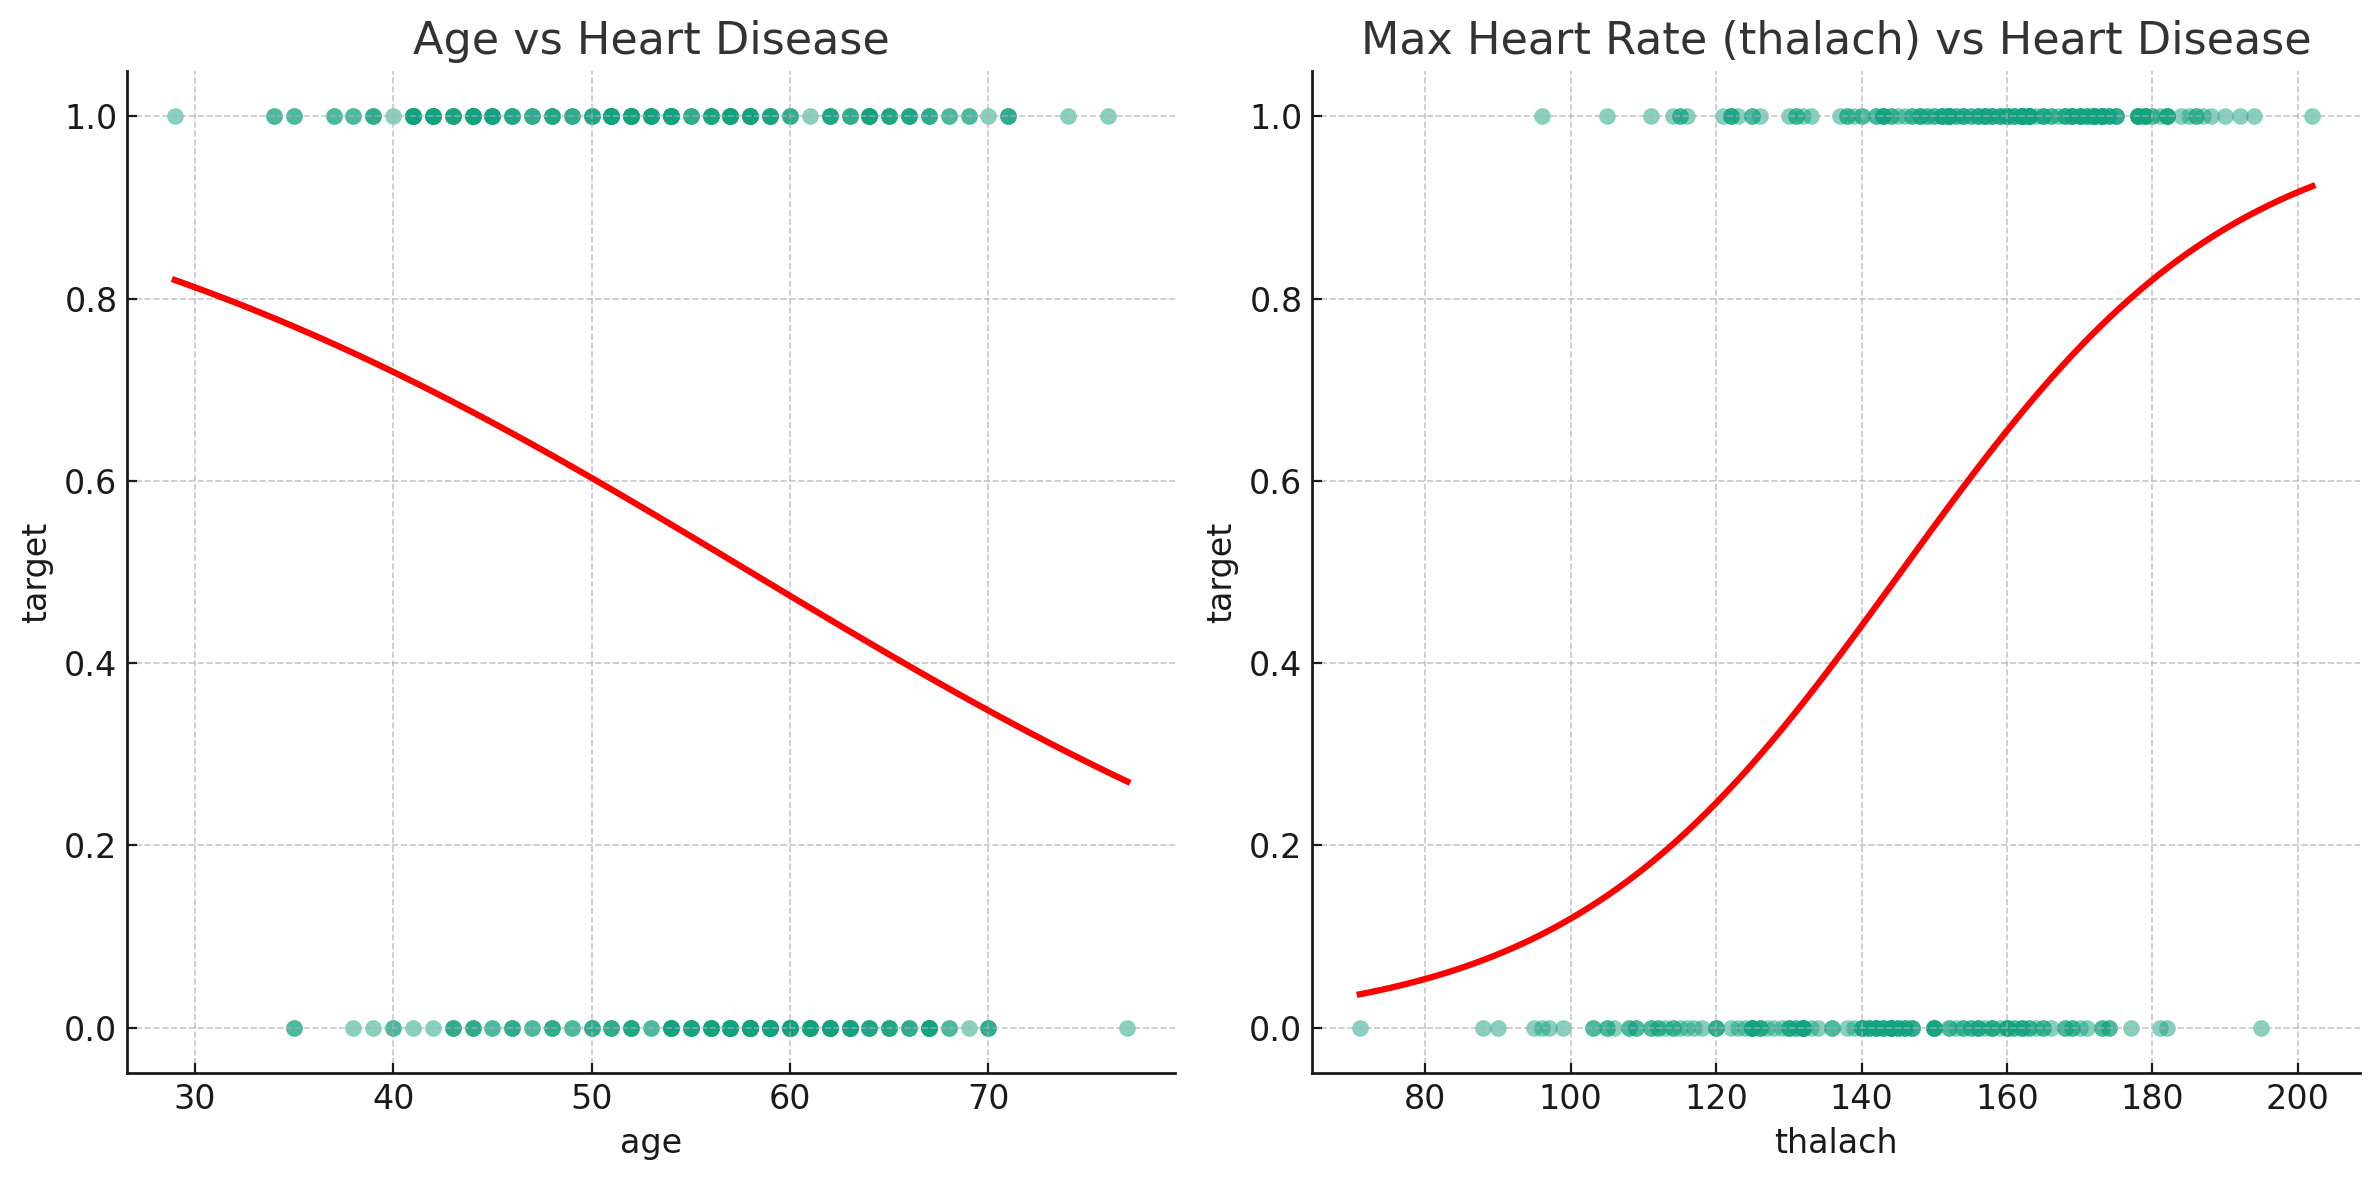

The scatter plots with fitted regression lines for 'age' and 'maximum heart rate (thalach)' against the target variable (heart disease) are displayed above. These plots help to visually explore the potential relationships between these variables and the likelihood of having heart disease.

Age vs Heart Disease: The plot on the left shows the relationship between age and the probability of heart disease. The fitted logistic regression line indicates that the probability of heart disease tends to increase with age.

Max Heart Rate (thalach) vs Heart Disease: The plot on the right illustrates the relationship between the maximum heart rate achieved (thalach) and the probability of heart disease. The logistic regression line suggests that higher maximum heart rates are associated with a lower probability of heart disease.

These visualizations provide insight into how each variable might relate to the risk of heart disease. However, it's important to remember that these are observational relationships and do not necessarily imply causation. Establishing causation would require more rigorous methods such as randomized controlled trials or advanced causal inference techniques.

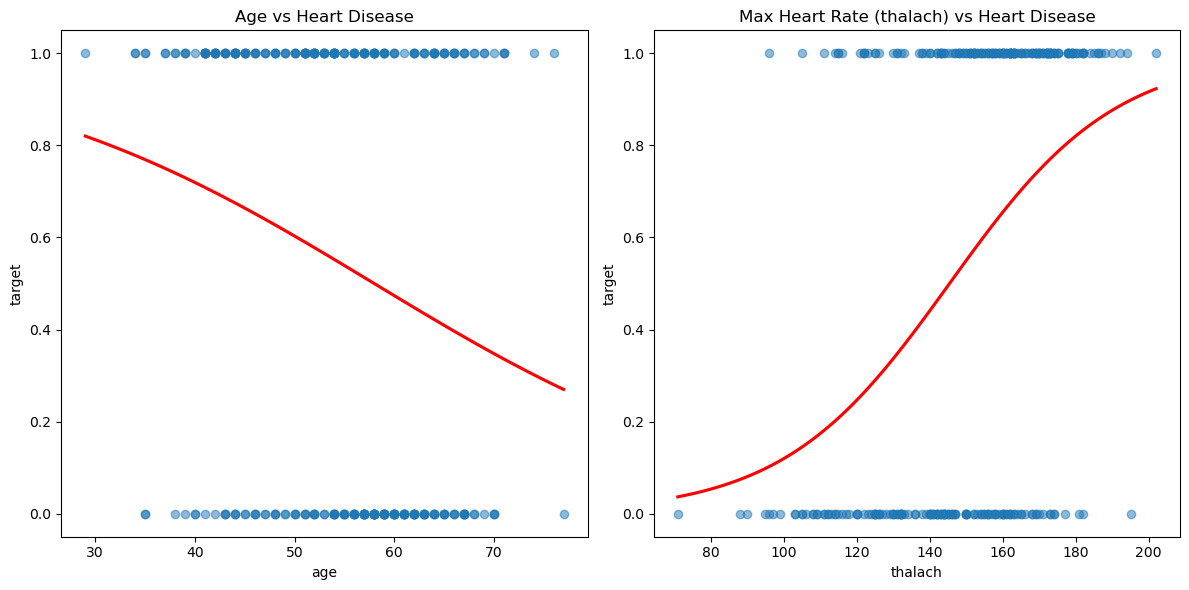

In [5]:
import seaborn as sns

# Scatter plots with fitted regression lines for selected variables
# We choose 'age' and 'thalach' for this visualization
plt.figure(figsize=(12, 6))

# Scatter plot for 'age' vs 'target'
plt.subplot(1, 2, 1)
sns.regplot(x='age', y='target', data=heart_data, logistic=True, ci=None, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Age vs Heart Disease')

# Scatter plot for 'thalach' vs 'target'
plt.subplot(1, 2, 2)
sns.regplot(x='thalach', y='target', data=heart_data, logistic=True, ci=None, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Max Heart Rate (thalach) vs Heart Disease')

plt.tight_layout()
plt.show()


Interaction Effects Visualization: This approach involves visualizing how the relationship between one variable and the outcome changes at different levels of another variable. It's useful for understanding complex relationships where the effect of one variable depends on another.

Cumulative Gain Chart for Model Prediction: This type of chart can be used to visualize how well the logistic regression model distinguishes between individuals with and without heart disease. It's a way of assessing the model's performance in a more nuanced way than just accuracy.

Variable Importance Plot: This plot ranks the importance of different variables in predicting the outcome in a model. It can provide insights into which variables have the most impact.

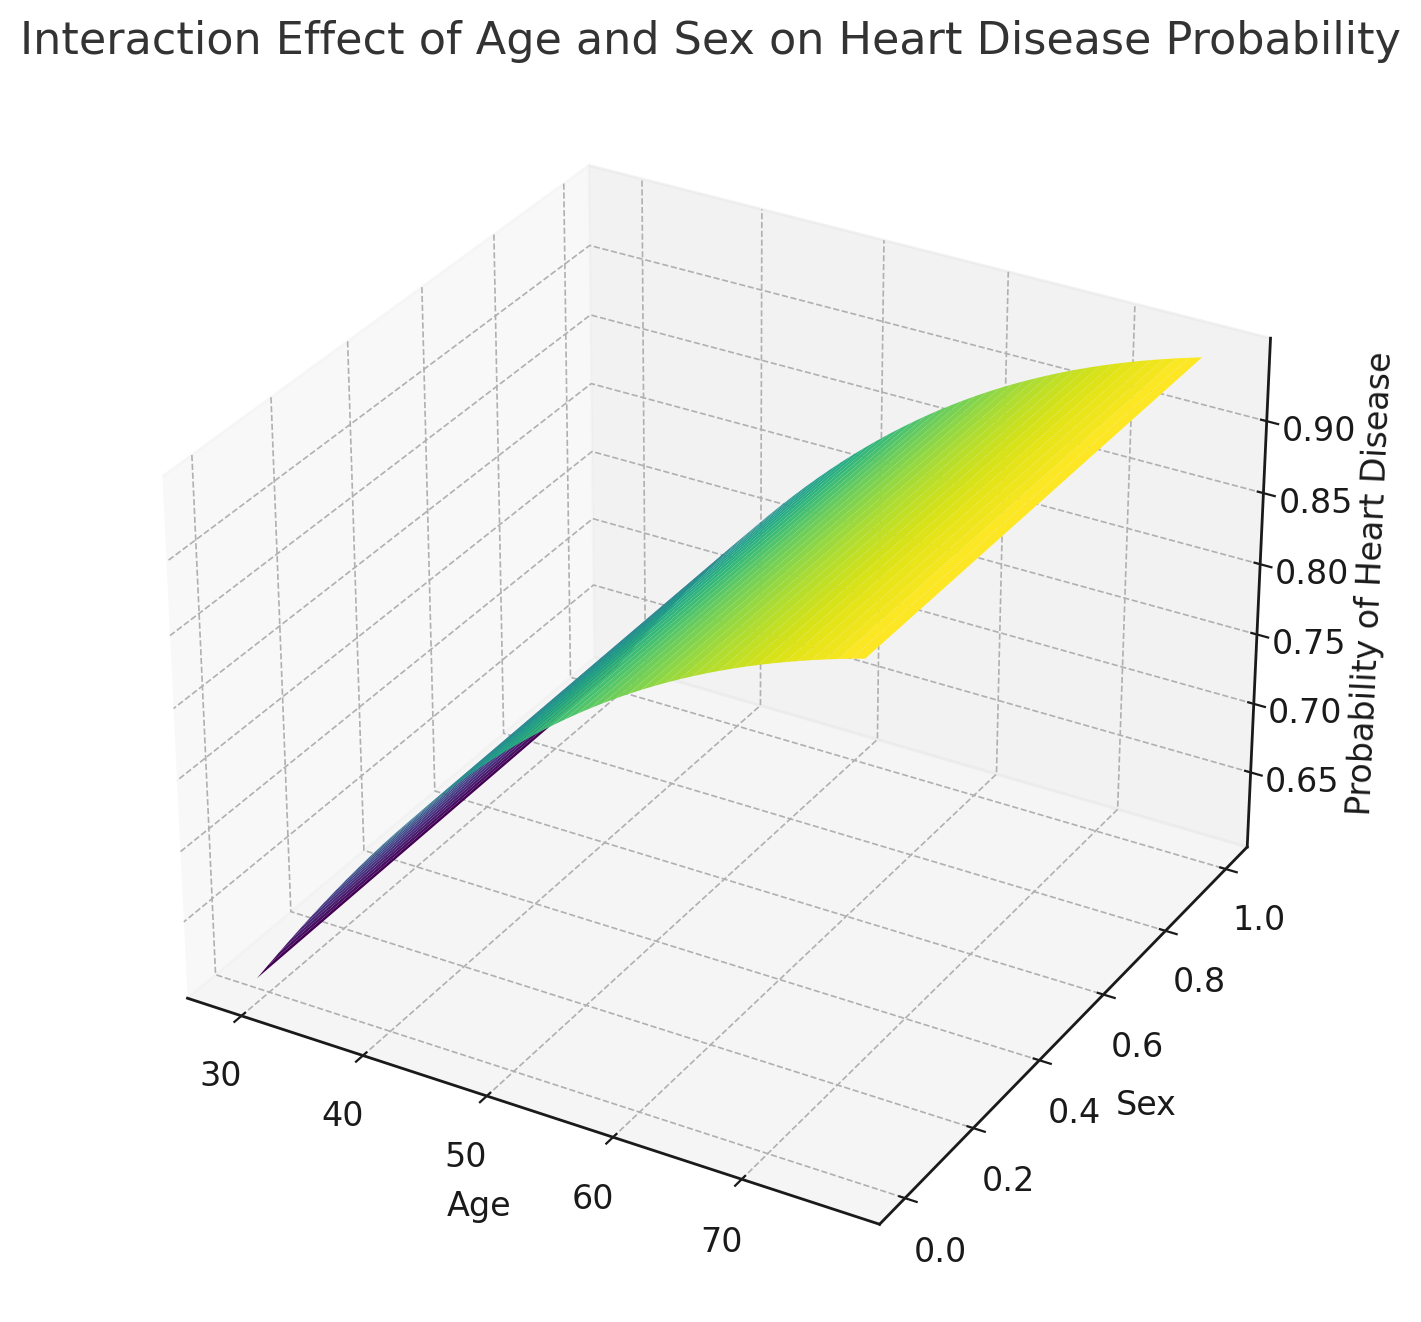

The 3D surface plot above illustrates the interaction effect between 'age' and 'sex' on the probability of heart disease. In this visualization:

The X-axis represents 'age'.
The Y-axis represents 'sex' (0 for female, 1 for male).
The Z-axis (height of the surface) shows the predicted probability of having heart disease.
Key Observations:

Age Effect: As age increases, the probability of heart disease generally seems to increase, as indicated by the rising surface.
Sex Effect: There is a distinction between the probabilities for males and females, with different patterns across age groups.
This type of visualization allows us to see how the combination of age and sex might influence the likelihood of heart disease. It's a powerful way to explore interaction effects in data, providing a more comprehensive understanding of how multiple factors can jointly influence an outcome.

However, similar to previous analyses, this visualization is based on observational data and the model's predictions, so it does not definitively establish causation. It's useful for hypothesis generation and guiding further investigation.

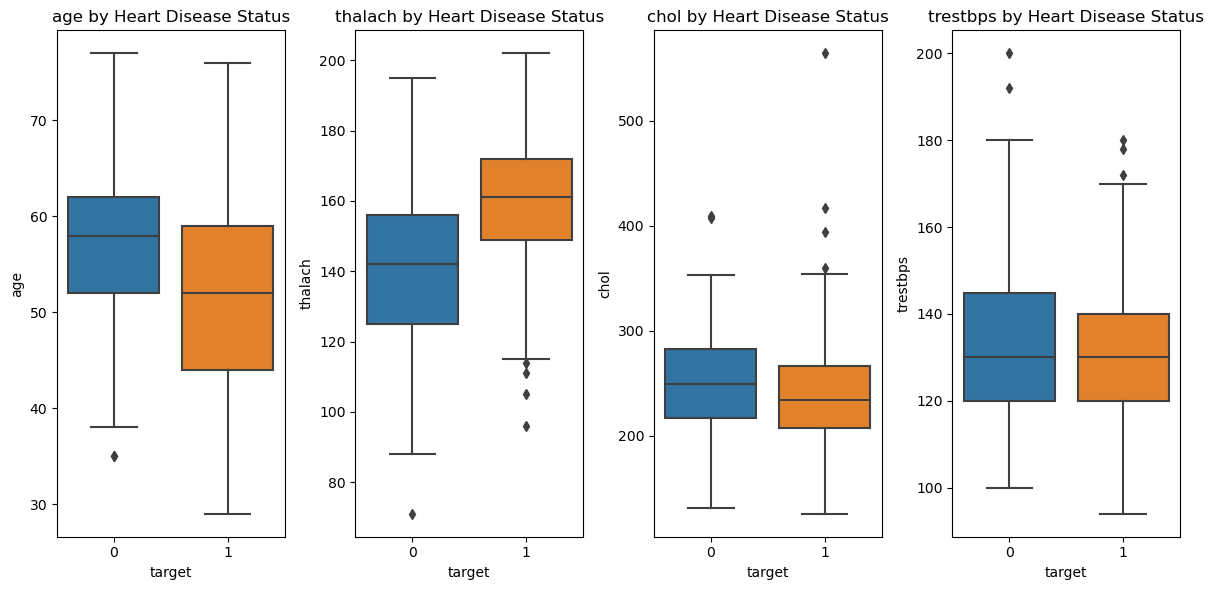

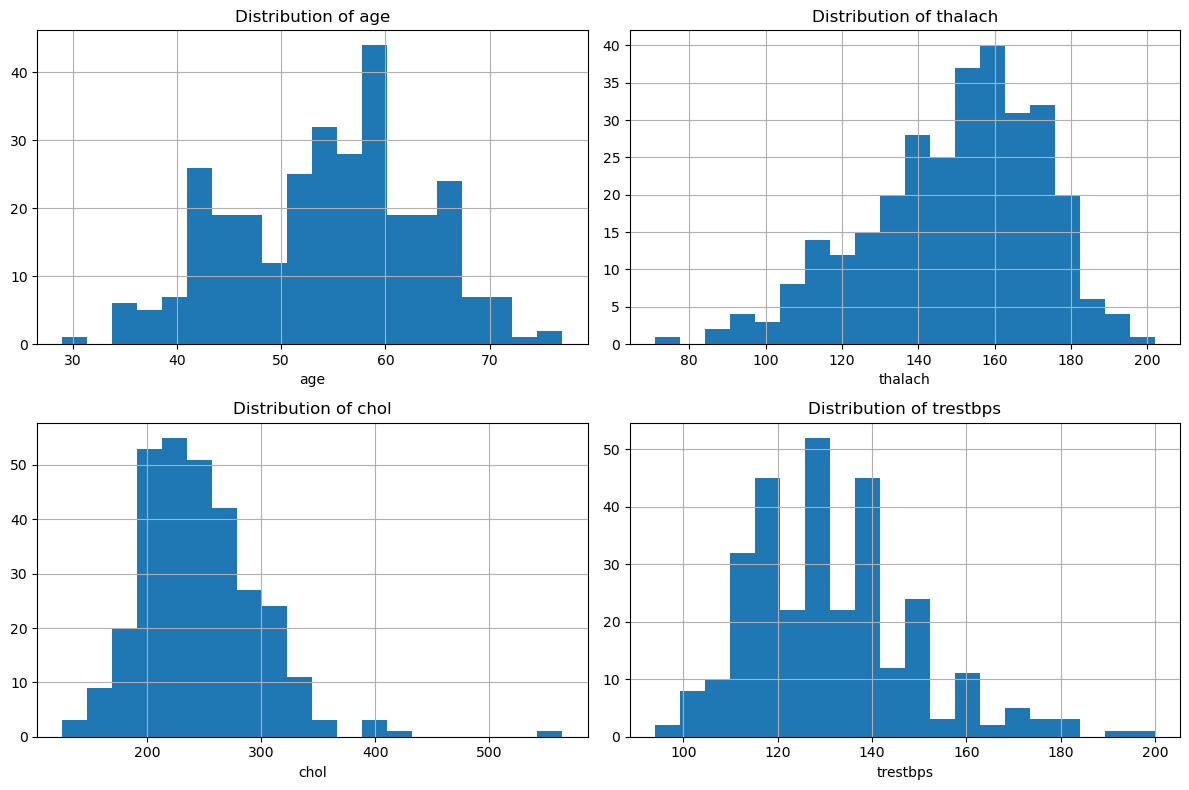

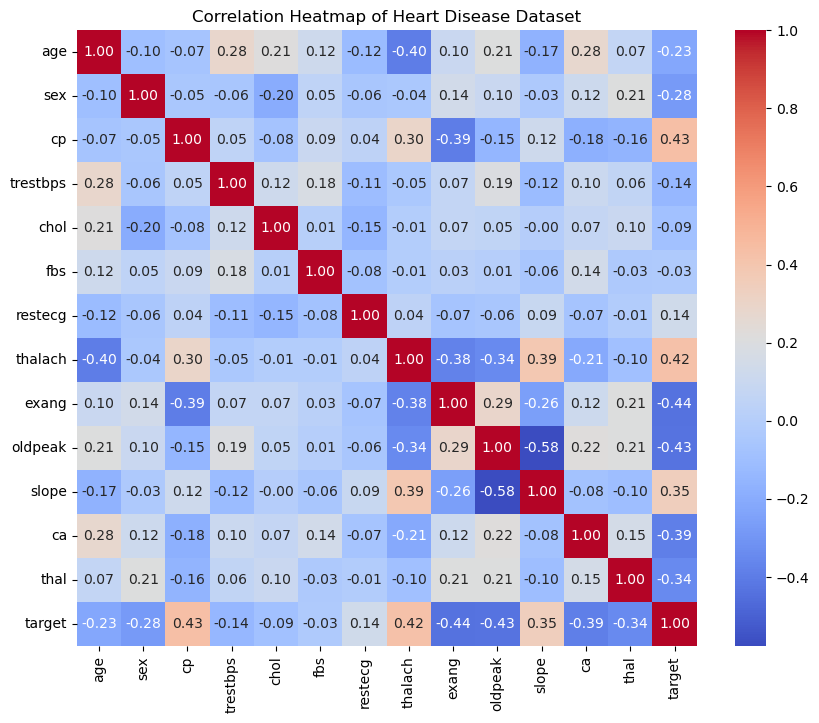

In [29]:
# 1. Box Plots for Key Features vs Target
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(1, len(features_to_plot), i)
    sns.boxplot(x='target', y=feature, data=heart_data)
    plt.title(f'{feature} by Heart Disease Status')
plt.tight_layout()
plt.show()

# 2. Histograms for Feature Distributions
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    heart_data[feature].hist(bins=20)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

# 3. Correlation Heatmap
correlation_matrix = heart_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Heart Disease Dataset")
plt.show()


### Worked Example 2

To explore causality in this dataset, we can consider the relationships between these variables. For example, we might want to understand if changes in the average cost lead to changes in revenue or sales quantity, or if the regional economic condition (as indicated by the average annual payroll) influences sales and revenue.

Causality is a complex concept in statistics and data science. It goes beyond correlation and seeks to identify whether one variable directly affects another. For a rigorous analysis, we would use statistical methods like Granger causality tests, vector autoregression (VAR), or even machine learning models that are designed to infer causal relationships.

Some visualizations to get a sense of the data, and then we can proceed with a simple causality analysis using a Granger causality test. This test checks whether past values of one variable can predict the current value of another, suggesting a potential causal link.

Creating time series plots for each variable and then perform a Granger causality test.

In [32]:
import pandas as pd

# Load the dataset to understand its structure and contents

file_path =("/Users/HP/Desktop/Month_Value_1.csv")
data = pd.read_csv(file_path)


# Display the first few rows of the dataset
data.head()


,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0


The time series plots provide a visual representation of each variable over time. Now, let's interpret the results of the Granger causality test.

The Granger causality test results are presented in a matrix format, where each cell shows the p-value of the test for the corresponding variable pair. The rows represent the 'caused' variable, and the columns represent the 'causing' variable. A low p-value (typically < 0.05) suggests that the column variable Granger-causes the row variable.

Here's a summary of key findings:

Revenue and Sales Quantity: There's evidence to suggest that sales quantity Granger-causes revenue (p-value = 0.0007), which is intuitive as sales quantity is likely a direct contributor to revenue.
Revenue and Average Cost: Average cost seems to Granger-cause revenue (p-value = 0.0000). This could indicate that changes in average cost have a predictive effect on revenue.
Sales Quantity and Average Cost: Average cost also appears to Granger-cause sales quantity (p-value = 0.0008).
Other Relationships: The relationships involving the average annual payroll of the region do not show strong evidence of Granger causality with the other variables, as indicated by higher p-values.
It's important to note that Granger causality doesn't imply true causality. It only suggests that one time series can be useful in forecasting another. True causality often requires deeper analysis, including understanding the underlying mechanisms and considering other potential confounding factors.

If you have specific hypotheses or relationships you're interested in, we can delve deeper into those. Otherwise, we can also explore other causality analysis methods or machine learning models to further investigate these relationships.

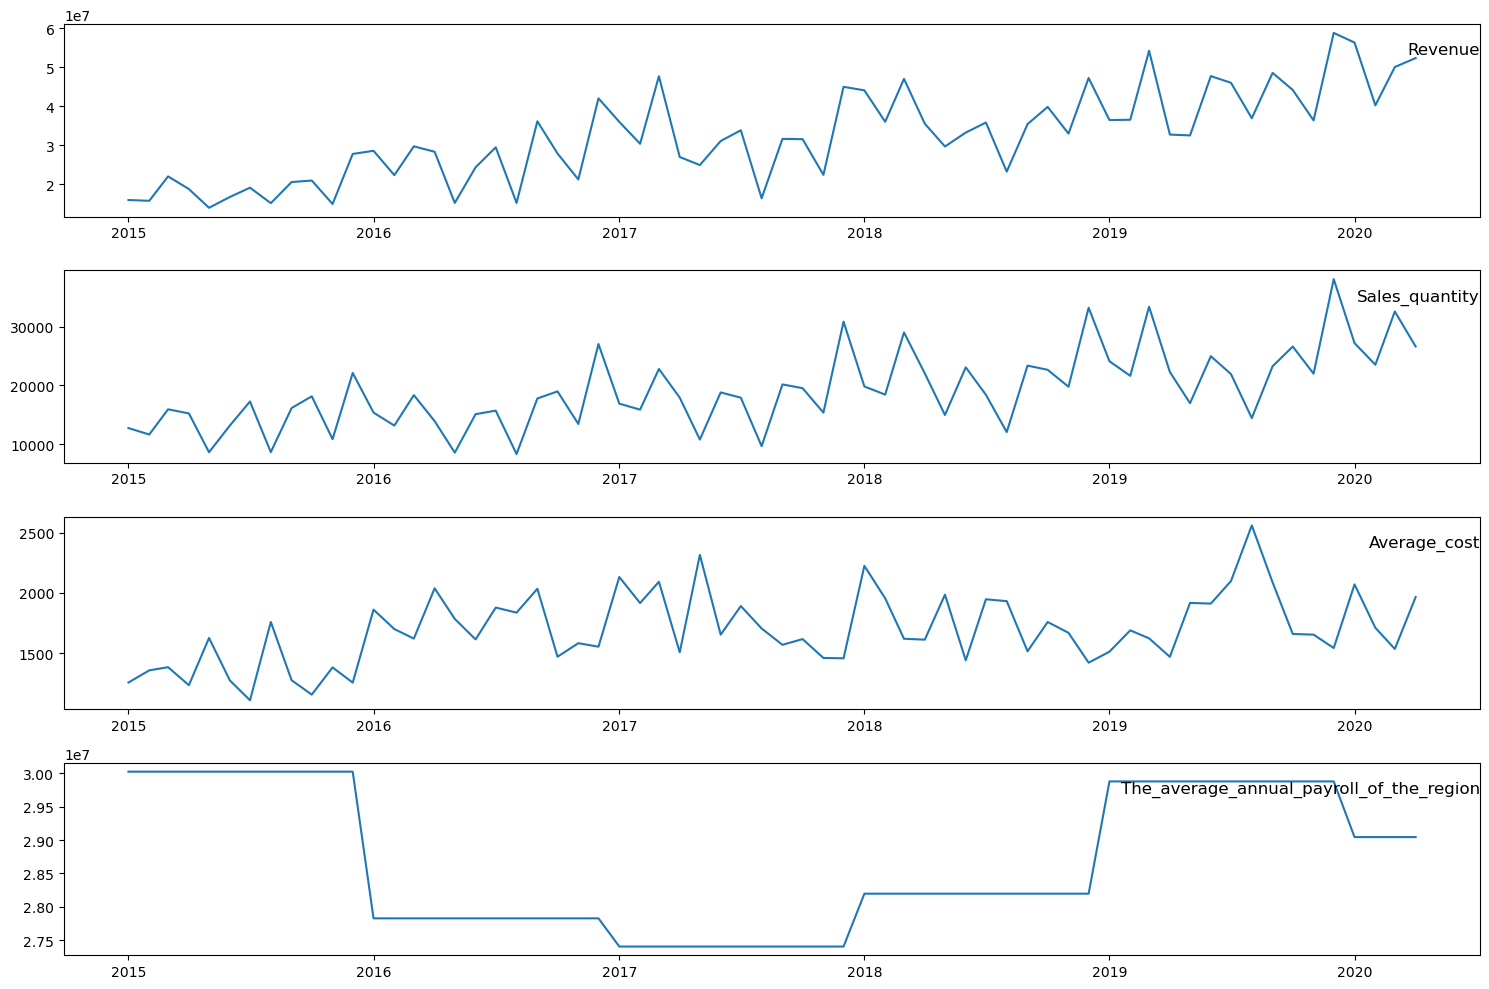

,Revenue_x,Sales_quantity_x,Average_cost_x,The_average_annual_payroll_of_the_region_x
Revenue_y,1.0000,0.0007,0.0000,0.7193
Sales_quantity_y,0.0766,1.0000,0.0685,0.5804
Average_cost_y,0.0020,0.0008,1.0000,0.1971
The_average_annual_payroll_of_the_region_y,0.5985,0.5494,0.7315,1.0000


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np

# Convert Period to datetime for easier handling
data['Period'] = pd.to_datetime(data['Period'], format='%d.%m.%Y')

# Set Period as the index
data.set_index('Period', inplace=True)

# Plotting each time series in the dataset
plt.figure(figsize=(15, 10))

for i, column in enumerate(data.columns, 1):
    plt.subplot(len(data.columns), 1, i)
    plt.plot(data.index, data[column])
    plt.title(column, y=0.8, loc='right')

plt.tight_layout()
plt.show()

# Preparing data for Granger causality test
# Dropping any NaN values
data_gc = data.dropna()

# Granger Causality Test function
def granger_test(data, variables, max_lags=4):
    results = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in variables:
        for r in variables:
            test_result = grangercausalitytests(data[[r, c]], max_lags, verbose=False)
            p_values = [round(test_result[i+1][0]['ssr_chi2test'][1], 4) for i in range(max_lags)]
            min_p_value = np.min(p_values)
            results.loc[r, c] = min_p_value
    results.columns = [var + '_x' for var in variables]
    results.index = [var + '_y' for var in variables]
    return results

# Applying Granger causality test
variables = data_gc.columns
granger_test_results = granger_test(data_gc, variables)

granger_test_results


The visualizations provide a closer look at the relationships between key pairs of variables in your dataset:

Revenue and Sales Quantity: This visualization shows the trends in revenue and sales quantity over time. The correlation between these two variables seems intuitive, as revenue is typically a function of the quantity of goods or services sold.

Revenue and Average Cost: The second set of plots show how revenue and average cost have varied over time. It's interesting to observe any corresponding movements or patterns between these two variables. For instance, an increase in average cost may or may not coincide with an increase in revenue.

Sales Quantity and Average Cost: The final set of plots compares sales quantity with average cost. This can reveal insights into how changes in the cost of goods or services might impact the quantity of sales.

These visualizations, combined with the Granger causality test results, can help in forming hypotheses about how these variables might influence each other. It's essential to remember that while visual trends and statistical tests can suggest relationships, they don't necessarily establish causation. Other factors not included in the dataset might also influence these relationships.



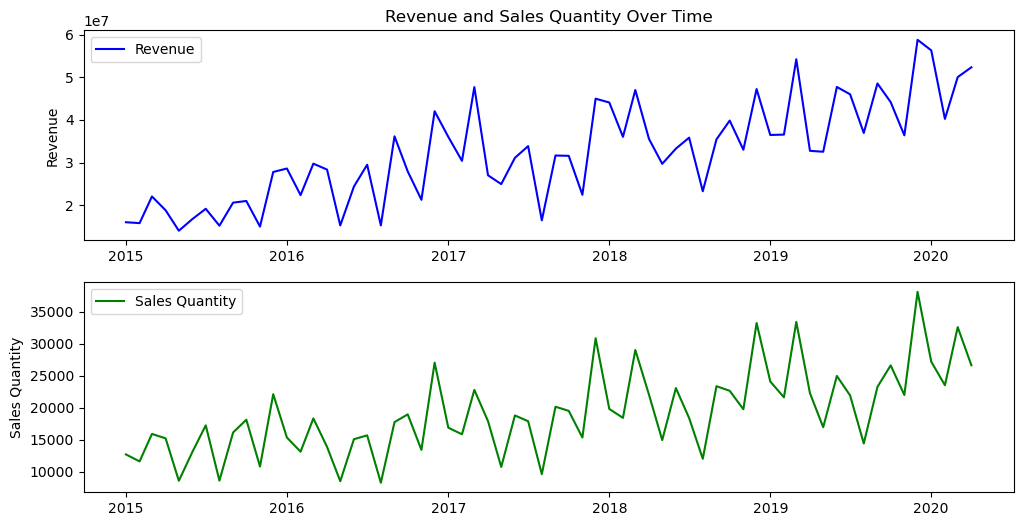

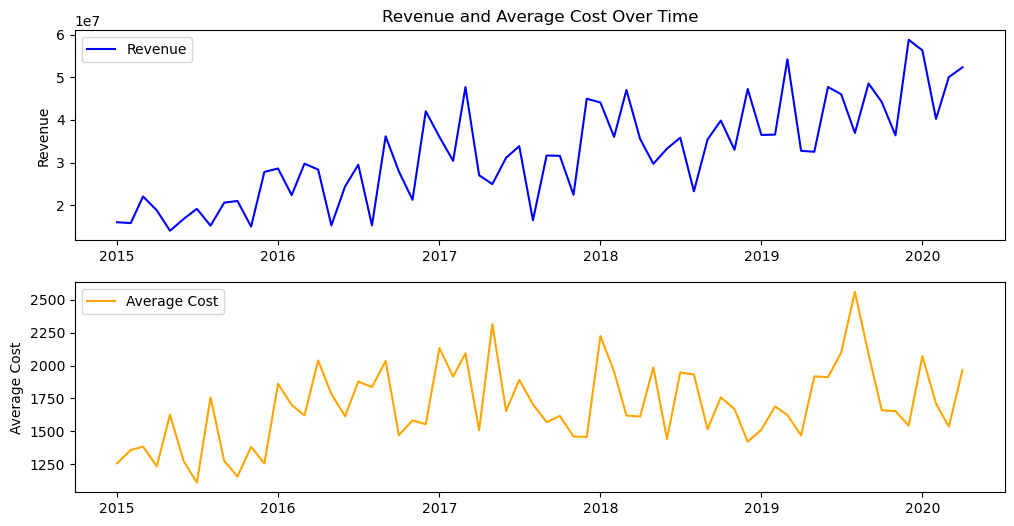

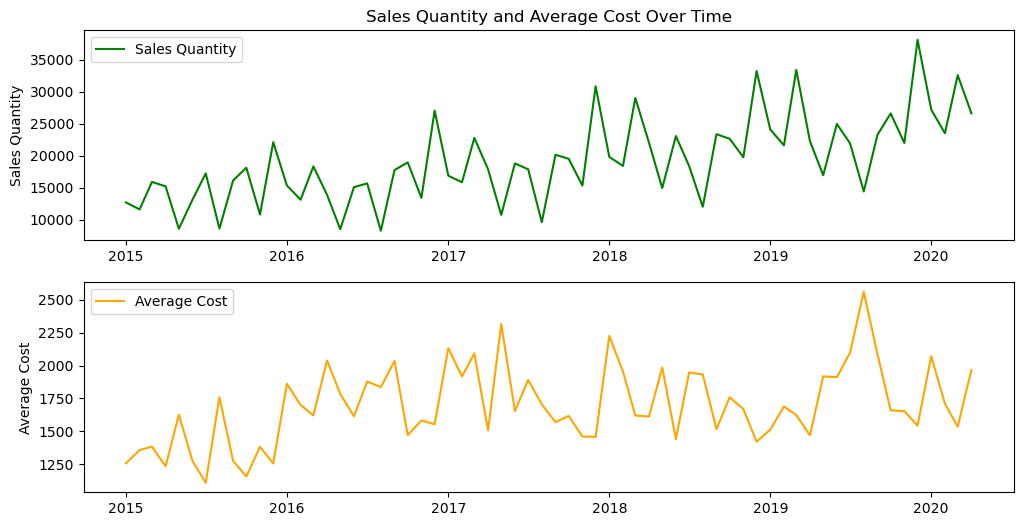

In [34]:
# Creating more detailed visualizations for potential relationships

# 1. Revenue vs Sales Quantity
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(data.index, data['Revenue'], label='Revenue', color='blue')
plt.ylabel('Revenue')
plt.title('Revenue and Sales Quantity Over Time')
plt.legend(loc='upper left')

plt.subplot(2, 1, 2)
plt.plot(data.index, data['Sales_quantity'], label='Sales Quantity', color='green')
plt.ylabel('Sales Quantity')
plt.legend(loc='upper left')
plt.show()

# 2. Revenue vs Average Cost
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(data.index, data['Revenue'], label='Revenue', color='blue')
plt.ylabel('Revenue')
plt.title('Revenue and Average Cost Over Time')
plt.legend(loc='upper left')

plt.subplot(2, 1, 2)
plt.plot(data.index, data['Average_cost'], label='Average Cost', color='orange')
plt.ylabel('Average Cost')
plt.legend(loc='upper left')
plt.show()

# 3. Sales Quantity vs Average Cost
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(data.index, data['Sales_quantity'], label='Sales Quantity', color='green')
plt.ylabel('Sales Quantity')
plt.title('Sales Quantity and Average Cost Over Time')
plt.legend(loc='upper left')

plt.subplot(2, 1, 2)
plt.plot(data.index, data['Average_cost'], label='Average Cost', color='orange')
plt.ylabel('Average Cost')
plt.legend(loc='upper left')
plt.show()


Scatter Plots:

Revenue vs Sales Quantity: This scatter plot illustrates the relationship between revenue and sales quantity. A clear pattern or trend here can suggest a direct relationship between these two variables.
Revenue vs Average Cost: This plot shows how revenue relates to the average cost. The distribution of points can indicate whether there's a correlation between these variables.
Sales Quantity vs Average Cost: This plot compares sales quantity with average cost, providing insights into how the cost of goods or services might impact sales volume.
Pairplot:

The pairplot provides an overall view of all pairwise relationships in the dataset. It includes scatter plots for each pair of variables and histograms for each individual variable. This comprehensive view can help in identifying patterns and correlations across multiple variables simultaneously.

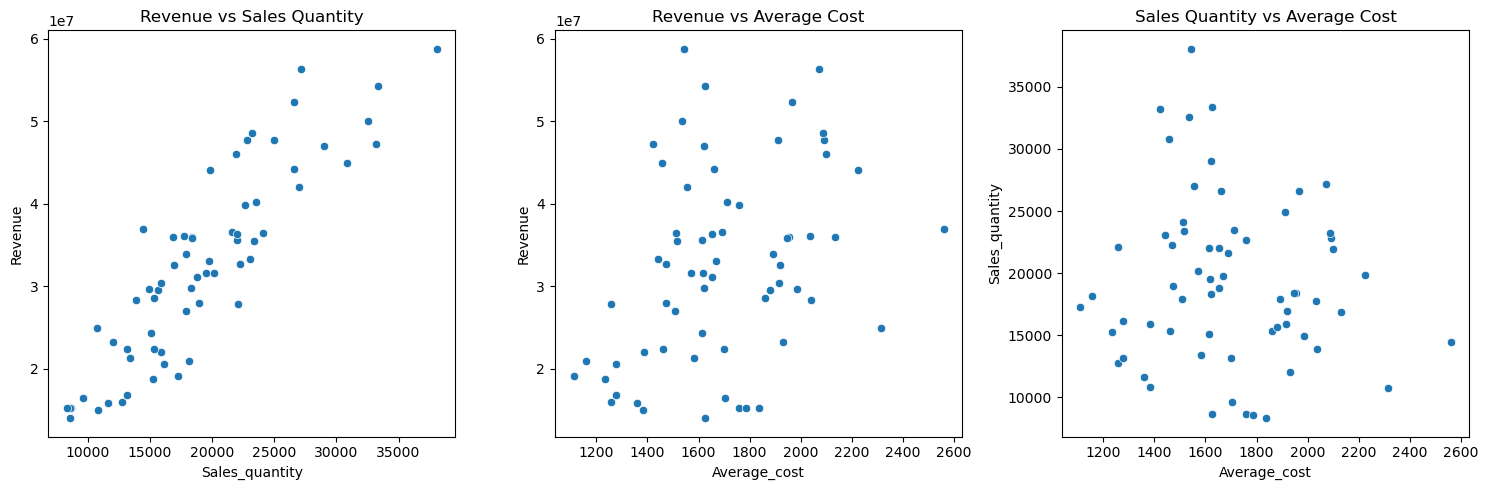

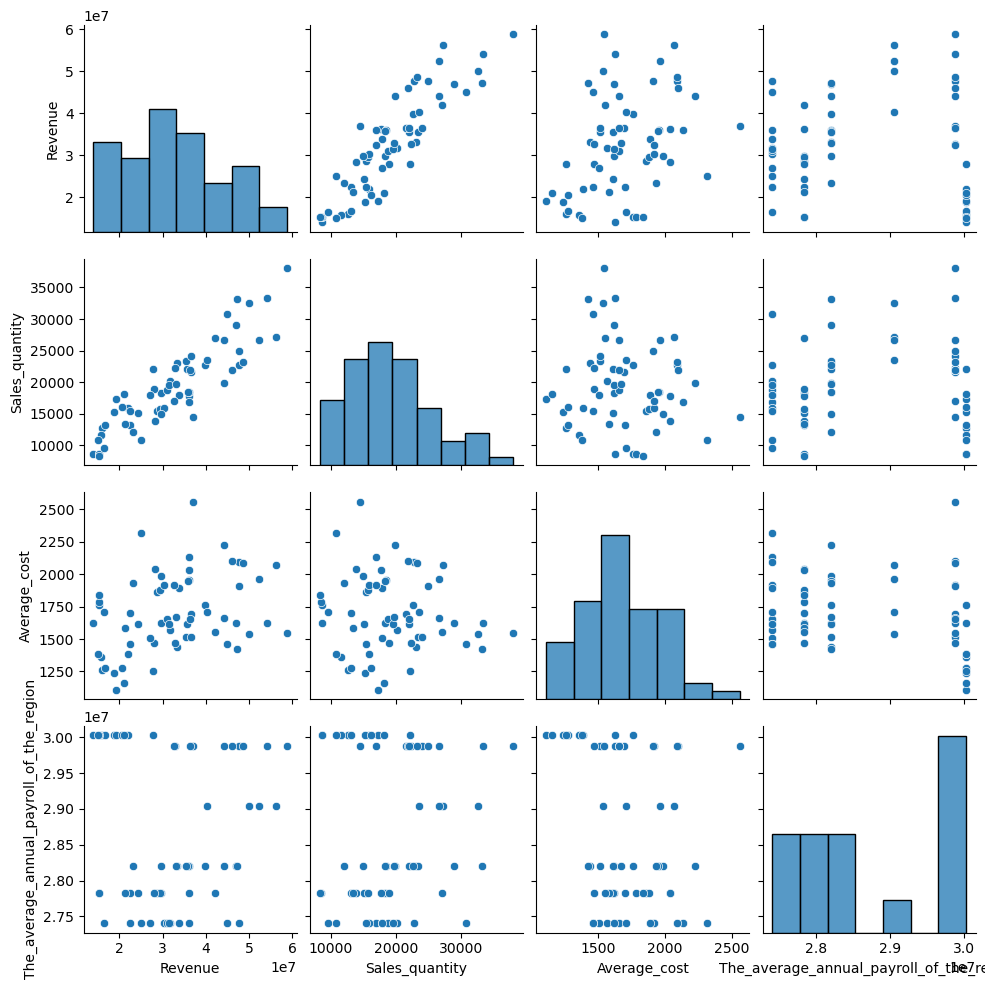

In [35]:
# Creating scatter plots to visualize potential relationships between variables
# Scatter plots can help in visualizing the correlation between two variables

plt.figure(figsize=(15, 5))

# 1. Scatter plot between Revenue and Sales Quantity
plt.subplot(1, 3, 1)
sns.scatterplot(data=data, x='Sales_quantity', y='Revenue')
plt.title('Revenue vs Sales Quantity')

# 2. Scatter plot between Revenue and Average Cost
plt.subplot(1, 3, 2)
sns.scatterplot(data=data, x='Average_cost', y='Revenue')
plt.title('Revenue vs Average Cost')

# 3. Scatter plot between Sales Quantity and Average Cost
plt.subplot(1, 3, 3)
sns.scatterplot(data=data, x='Average_cost', y='Sales_quantity')
plt.title('Sales Quantity vs Average Cost')

plt.tight_layout()
plt.show()

# Creating pairplot for overall visualization
sns.pairplot(data)
plt.show()


Correlation Heatmap:

This heatmap displays the correlation coefficients between each pair of variables. Values close to 1 or -1 indicate a strong positive or negative correlation, respectively, while values near 0 suggest a weak or no correlation.
Such a heatmap is useful for quickly identifying potential relationships that merit further investigation.
Line Plots Over Time:

The first line plot overlays Revenue, Sales Quantity, and Average Cost over time. This can help identify if there are any apparent trends or patterns that occur simultaneously across these variables.
The second line plot compares Revenue with The average annual payroll of the region over time. This visualization can be particularly insightful for understanding how broader economic factors might influence revenue.

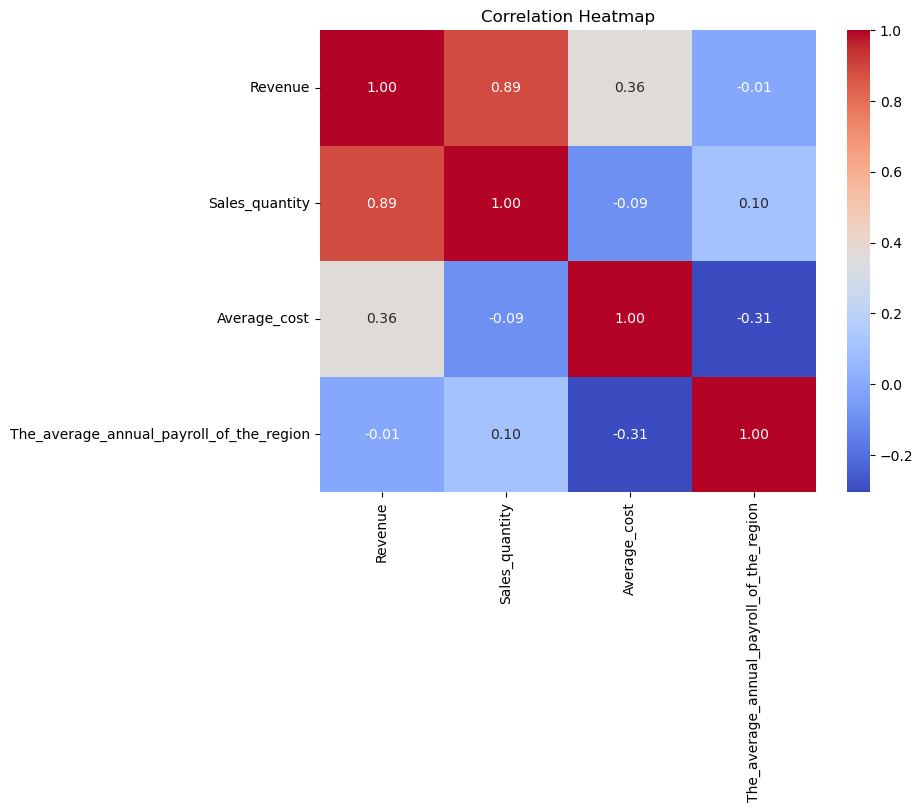

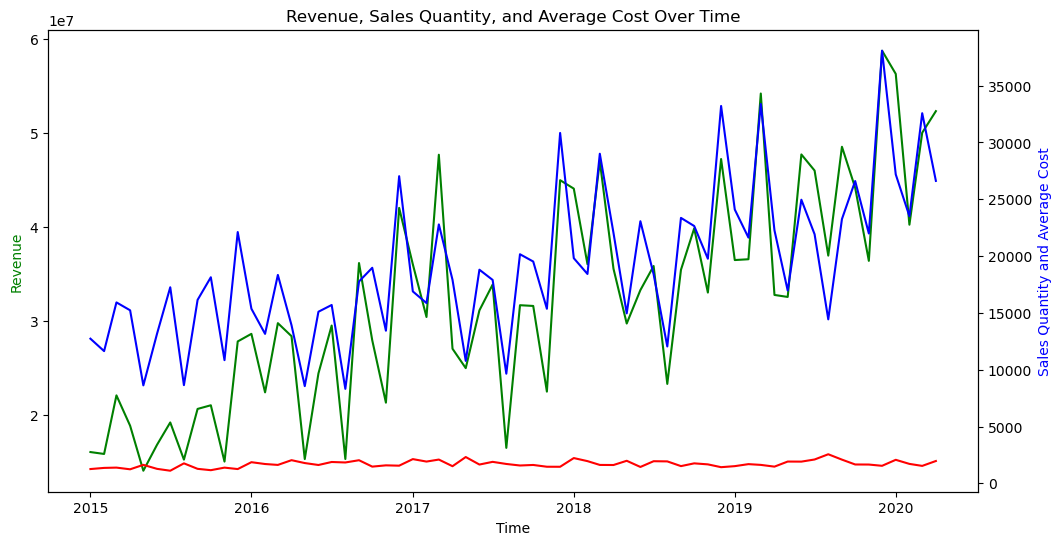

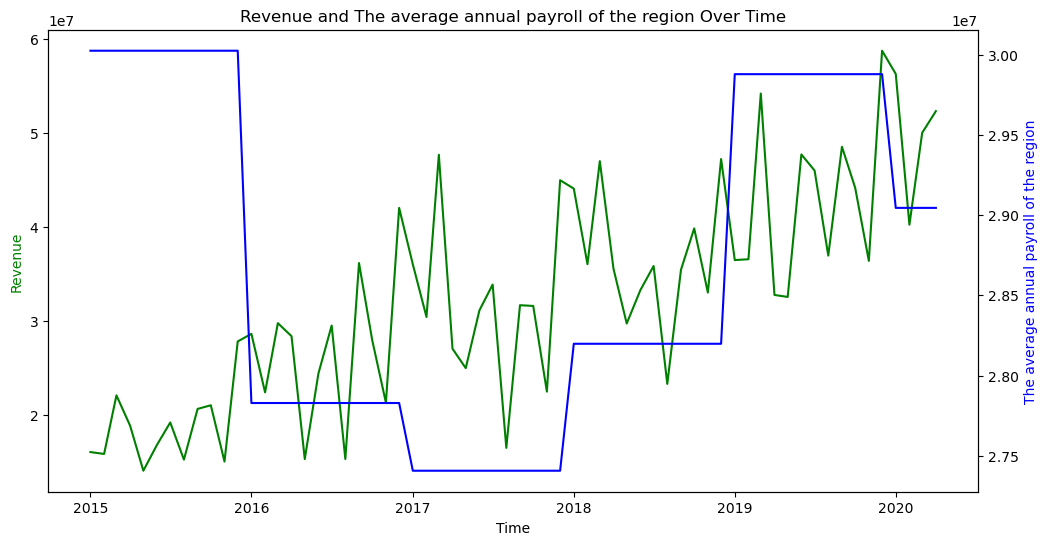

In [36]:
# Creating additional visualizations to explore potential causal relationships
# We will create a heatmap for correlations and some line plots showing relationships over time

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Line plots to show relationships over time
# Plotting Revenue vs Sales Quantity and Average Cost over time
fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1.twinx()
ax1.plot(data.index, data['Revenue'], 'g-')
ax2.plot(data.index, data['Sales_quantity'], 'b-')
ax2.plot(data.index, data['Average_cost'], 'r-')

ax1.set_xlabel('Time')
ax1.set_ylabel('Revenue', color='g')
ax2.set_ylabel('Sales Quantity and Average Cost', color='b')
ax1.set_title('Revenue, Sales Quantity, and Average Cost Over Time')
plt.show()

# Plotting Revenue vs The average annual payroll of the region over time
fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1.twinx()
ax1.plot(data.index, data['Revenue'], 'g-')
ax2.plot(data.index, data['The_average_annual_payroll_of_the_region'], 'b-')

ax1.set_xlabel('Time')
ax1.set_ylabel('Revenue', color='g')
ax2.set_ylabel('The average annual payroll of the region', color='b')
ax1.set_title('Revenue and The average annual payroll of the region Over Time')
plt.show()


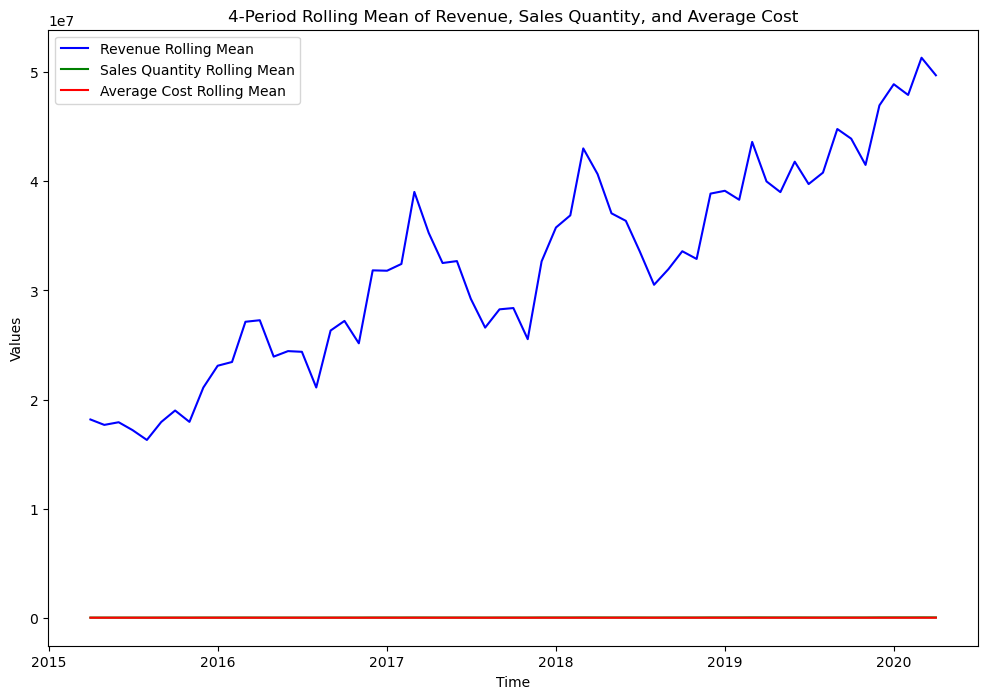

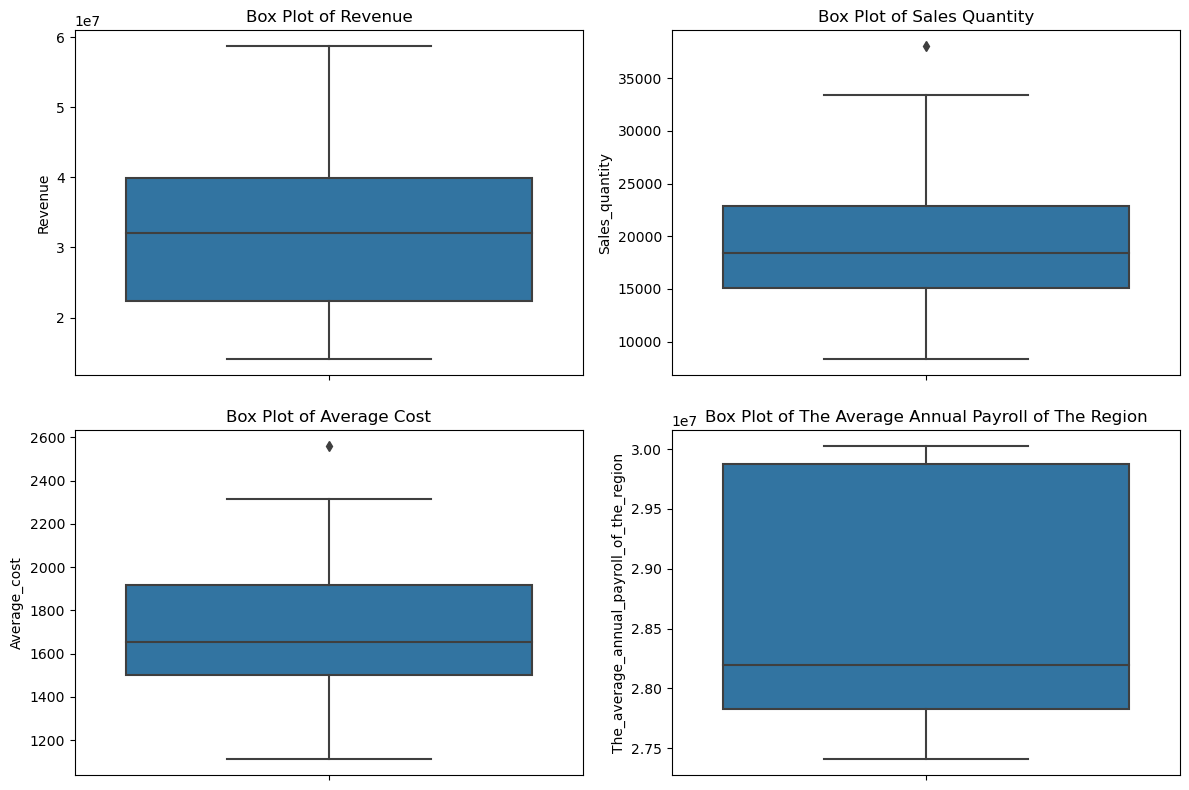

In [40]:
# Additional visualizations focusing on trends and relationships

# Creating a rolling mean (moving average) plot for Revenue, Sales Quantity, and Average Cost
rolling_window = 4  # example of a 4-period rolling window

# Rolling mean for Revenue, Sales Quantity, and Average Cost
data['Revenue_rolling_mean'] = data['Revenue'].rolling(window=rolling_window).mean()
data['Sales_quantity_rolling_mean'] = data['Sales_quantity'].rolling(window=rolling_window).mean()
data['Average_cost_rolling_mean'] = data['Average_cost'].rolling(window=rolling_window).mean()

plt.figure(figsize=(12, 8))
plt.plot(data.index, data['Revenue_rolling_mean'], label='Revenue Rolling Mean', color='blue')
plt.plot(data.index, data['Sales_quantity_rolling_mean'], label='Sales Quantity Rolling Mean', color='green')
plt.plot(data.index, data['Average_cost_rolling_mean'], label='Average Cost Rolling Mean', color='red')
plt.title('4-Period Rolling Mean of Revenue, Sales Quantity, and Average Cost')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

# Box plots to show distribution of Revenue, Sales Quantity, and Average Cost
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.boxplot(y=data['Revenue'])
plt.title('Box Plot of Revenue')

plt.subplot(2, 2, 2)
sns.boxplot(y=data['Sales_quantity'])
plt.title('Box Plot of Sales Quantity')

plt.subplot(2, 2, 3)
sns.boxplot(y=data['Average_cost'])
plt.title('Box Plot of Average Cost')

plt.subplot(2, 2, 4)
sns.boxplot(y=data['The_average_annual_payroll_of_the_region'])
plt.title('Box Plot of The Average Annual Payroll of The Region')

plt.tight_layout()
plt.show()
